In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Đọc data từ file data.csv

data=pd.read_csv('dataset\data.csv')

# CÂU HỎI: ĐỘ TUỔI, GIỜ TẬP THỂ DỤC, GIỜ NGỒI CÓ LÀM TĂNG NGUY CƠ MẮC BÊNH TIM KHÔNG?
# BIỂU ĐỒ SỬ DỤNG:
## 1. BIỂU ĐỒ PIE:
    - Biến sử dụng: Age, Heart Attack Risk.
    - Ý nghĩa: Nhận biết độ tuổi nào chiếm cao nhất trong những người có nguy cơ mắc bệnh tim.
    - Lý do sử dụng: Biểu đồ pie tập trung vào tỷ lệ phần trăm, giúp nhấn mạnh sự phân bố của các nhóm tuổi trong tổng thể những người có nguy cơ mắc bệnh tim.
## 2. BIỂU ĐỒ HEATMAP:
    - Biến sử dụng: Age, Exercise Hours Per Week, Heart Attack Risk.
    - Ý nghĩa: Nhận biết nhóm tuổi nào có xu hướng tập thể dục nhiều hơn trong những người có nguy cơ mắc bệnh tim, từ đó giải thích tại sao có sự phân bố như ở biểu đồ Pie
    - Lý do sử dụng: Heatmap giúp bạn dễ dàng nhận biết mối quan hệ giữa độ tuổi, số giờ tập thể dục mỗi tuần và nguy cơ mắc bệnh tim. Màu sắc trong heatmap có thể biểu thị mức độ tương quan hoặc tần suất xuất hiện của các giá trị, giúp bạn nhanh chóng nhận ra các mẫu dữ liệu.
## 3. BIỂU ĐỒ AREA:
    - Biến sử dụng: Age, Sedentary hours per day, Heart Attack Risk.
    - Ý nghĩa: Nhận biết nhóm tuổi nào có xu hướng ngồi nhiều trong những có nguy cơ mắc bệnh tim, từ đó giải thích tại sao có sự phân bố ở biểu đồ Pie.
    - Lý do sử dụng: Biểu đồ area giúp bạn dễ dàng nhận biết sự phân bố của các nhóm tuổi và số giờ ngồi mỗi ngày trong tổng thể những người có nguy cơ mắc bệnh tim. Màu sắc và diện tích trong biểu đồ area có thể biểu thị mức độ tương quan hoặc tần suất xuất hiện của các giá trị, giúp bạn nhanh chóng nhận ra các mẫu dữ liệu.

# Biểu đồ 1: Pie Chart

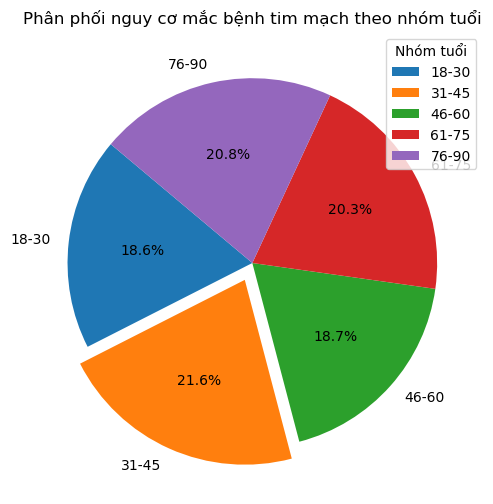

In [59]:
#Phân tích dữ liệu
#Tạo danh sách chứa số lượng người có nguy cơ mắc bệnh tim mạch ở mỗi nhóm tuổi 18-30, 31-45, 46-60, 61-75, 76-90
group_age_heart_risk=[0,0,0,0,0]

for i in range(len(data)):
    data_row=data.iloc[i]
    if data_row["Heart Attack Risk"]== 1:
        if data_row["Age"]<=30:
            group_age_heart_risk[0]+=1
        elif data_row["Age"]<=45:
            group_age_heart_risk[1]+=1
        elif data_row["Age"]<=60:
            group_age_heart_risk[2]+=1
        elif data_row["Age"]<=75:
            group_age_heart_risk[3]+=1
        elif data_row["Age"]<=90:
            group_age_heart_risk[4]+=1
    
percent_group_age=[round(group_age_heart_risk[i]/sum(group_age_heart_risk)*100,2) for i in range(5)]


#Vẽ biểu đồ
explode=(0,0.1,0,0,0)
plt.figure(figsize=(10,6))
plt.pie(percent_group_age,labels=["18-30","31-45","46-60","61-75","76-90"],autopct='%1.1f%%',startangle=140,explode=explode)
plt.legend(title="Nhóm tuổi")
plt.title("Phân phối nguy cơ mắc bệnh tim mạch theo nhóm tuổi")
plt.show()



```markdown
### Nhận xét biểu đồ
- Biểu đồ pie chart cho thấy rằng nhóm tuổi từ 31-45 có tỷ lệ nguy cơ mắc bệnh tim mạch cao nhất, chiếm 21.6% tổng số ca nguy cơ.
- Lý do là vì ở độ tuổi này chật vật công việc, áp lực cuộc sống, thói quen ăn uống, sinh hoạt không tốt, ít vận động, nghỉ ngơi không đủ, thói quen hút thuốc, uống rượu, stress,... 
- Tiếp đến là hai nhóm cao tuổi 61-75 và 76-90. Tuổi cao nên dễ mắc bệnh hơn, cơ thể yếu, hệ miễn dịch giảm, dễ mắc bệnh tim mạch hơn.
- Nhìn chung biểu đồ cho thấy nguy cơ mắc bệnh tim mạch tăng theo độ tuổi.
```

# BIỂU ĐỒ HEATMAP: BIỂU ĐỒ THỂ HIỆN THỜI GIAN TẬP THỂ DỤC HÀNG NGÀY Ở TỪNG ĐỘ TUỔI Ở CÁC NHÓM NGUY CƠ MẮC BỆNH TIM MẠCH

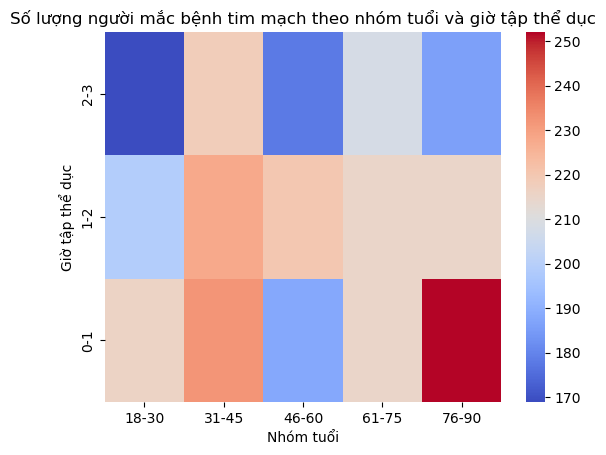

In [61]:
#BIỂU ĐỒ: HEATMAP

heart_attack_list=[]
#Tạo danh sách chứa số lượng người có nguy cơ mắc bệnh tim mạch ở mỗi nhóm tập thể dục 0-1, 1-2, 2-3 ở các độ tuổi 18-30, 31-45, 46-60, 61-75, 76-90
for i in range(len(data)):
    data_row=data.iloc[i]
    if data_row["Heart Attack Risk"]== 1:
        data_new_row=[]
        #Xét nhóm tập thể dục
        ex_hours_per_day=round(data_row["Exercise Hours Per Week"]/7,2)
        if ex_hours_per_day<=1:
            data_new_row.append("0-1")
        elif ex_hours_per_day<=2:
            data_new_row.append("1-2")
        elif ex_hours_per_day<=3:
            data_new_row.append("2-3") 

        #Xét nhóm tuổi
        if data_row["Age"]<=30:
            data_new_row.append("18-30")
        elif data_row["Age"]<=45:
            data_new_row.append("31-45")
        elif data_row["Age"]<=60:
            data_new_row.append("46-60")
        elif data_row["Age"]<=75:
            data_new_row.append("61-75")
        elif data_row["Age"]<=90:
            data_new_row.append("76-90")

        heart_attack_list.append(data_new_row)

# Phân loại dữ liệu theo giờ tập thể dục

df_ehpd=pd.DataFrame(heart_attack_list,columns=["Exercise Hours Per Day","Age Group"])


# Đặt thứ tự cho nhóm tuổi và giờ tập thể dục
age_order = ["18-30", "31-45", "46-60", "61-75", "76-90"]
exercise_order = ["0-1", "1-2", "2-3"]

df_ehpd["Age Group"] = pd.Categorical(df_ehpd["Age Group"], categories=age_order, ordered=True)
df_ehpd["Exercise Hours Per Day"] = pd.Categorical(df_ehpd["Exercise Hours Per Day"], categories=reversed(exercise_order), ordered=True)

heatmap_data = df_ehpd.groupby(["Exercise Hours Per Day","Age Group"]).size().unstack(fill_value=0)


# Vẽ heatmap 

sns.heatmap(heatmap_data,fmt='d',cmap='coolwarm')
plt.title("Số lượng người mắc bệnh tim mạch theo nhóm tuổi và giờ tập thể dục")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Giờ tập thể dục")

plt.show()
        

### Nhận xét:
- Nhìn chung, đa số các độ tuổi không dành quá nhiều thời gian để tập thể dục.
- Cụ thể, độ tuổi **31-45** đa số ít dành thời gian tập thể dục nên tỉ lệ mắc bệnh tim cao hơn các nhóm tuổi khác.
- Tiếp đến là độ tuổi **61-75** và **76-90**. Độ tuổi này đã lớn và có thể không còn nhiều sức để tập, đặc biệt là độ tuổi 76-90.
- Theo sau đó là **18-30** và **46-60**. Mặc dù **18-30** có vẻ dành ít thời gian hơn nhưng tỉ lệ cao hơn là do tuổi còn khá trẻ nên sức khỏe còn cao.

# BIỂU ĐỒ MIỀN: 

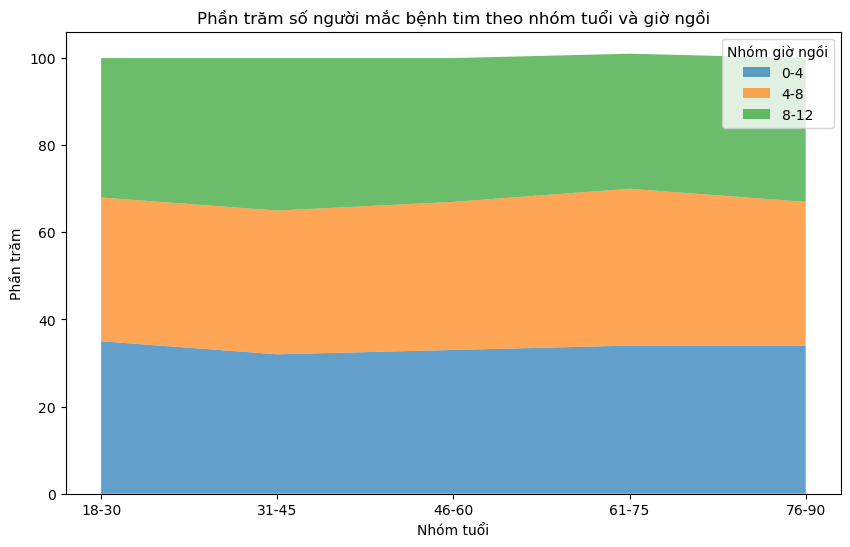

In [65]:
features=["Age","Sedentary Hours Per Day","Heart Attack Risk"]
new_data=data[features]

age_shpd_heart_list={
    "18-30":[0,0,0],
    "31-45":[0,0,0],
    "46-60":[0,0,0],
    "61-75":[0,0,0],
    "76-90":[0,0,0]
}
for i in range(len(new_data)):
    data_row=new_data.iloc[i]
    if data_row["Heart Attack Risk"]== 1:
        sedentary_hours_per_day=round(data_row["Sedentary Hours Per Day"],2)
        if data_row["Age"]<=30:
            if sedentary_hours_per_day <=4:
                age_shpd_heart_list["18-30"][0]+=1
            elif sedentary_hours_per_day <=8:
                age_shpd_heart_list["18-30"][1]+=1
            elif sedentary_hours_per_day <=12:
                age_shpd_heart_list["18-30"][2]+=1
        elif data_row["Age"]<=45:
            if sedentary_hours_per_day <=4:
                age_shpd_heart_list["31-45"][0]+=1
            elif sedentary_hours_per_day <=8:
                age_shpd_heart_list["31-45"][1]+=1
            elif sedentary_hours_per_day <=12:
                age_shpd_heart_list["31-45"][2]+=1
        elif data_row["Age"]<=60:
            if sedentary_hours_per_day <=4:
                age_shpd_heart_list["46-60"][0]+=1
            elif sedentary_hours_per_day <=8:
                age_shpd_heart_list["46-60"][1]+=1
            elif sedentary_hours_per_day <=12:
                age_shpd_heart_list["46-60"][2]+=1
        elif data_row["Age"]<=75:
            if sedentary_hours_per_day <=4:
                age_shpd_heart_list["61-75"][0]+=1
            elif sedentary_hours_per_day <=8:
                age_shpd_heart_list["61-75"][1]+=1
            elif sedentary_hours_per_day <=12:
                age_shpd_heart_list["61-75"][2]+=1
        elif data_row["Age"]<=90:
            if sedentary_hours_per_day <=4:
                age_shpd_heart_list["76-90"][0]+=1
            elif sedentary_hours_per_day <=8:
                age_shpd_heart_list["76-90"][1]+=1
            elif sedentary_hours_per_day <=12:
                age_shpd_heart_list["76-90"][2]+=1

age_shpd_heart_list_percent={
    "18-30":[100*round(age_shpd_heart_list["18-30"][0]/sum(age_shpd_heart_list["18-30"]),2),100*round(age_shpd_heart_list["18-30"][1]/sum(age_shpd_heart_list["18-30"]),2),100*round(age_shpd_heart_list["18-30"][2]/sum(age_shpd_heart_list["18-30"]),2)],
    "31-45":[100*round(age_shpd_heart_list["31-45"][0]/sum(age_shpd_heart_list["31-45"]),2),100*round(age_shpd_heart_list["31-45"][1]/sum(age_shpd_heart_list["31-45"]),2),100*round(age_shpd_heart_list["31-45"][2]/sum(age_shpd_heart_list["31-45"]),2)],
    "46-60":[100*round(age_shpd_heart_list["46-60"][0]/sum(age_shpd_heart_list["46-60"]),2),100*round(age_shpd_heart_list["46-60"][1]/sum(age_shpd_heart_list["46-60"]),2),100*round(age_shpd_heart_list["46-60"][2]/sum(age_shpd_heart_list["46-60"]),2)],
    "61-75":[100*round(age_shpd_heart_list["61-75"][0]/sum(age_shpd_heart_list["61-75"]),2),100*round(age_shpd_heart_list["61-75"][1]/sum(age_shpd_heart_list["61-75"]),2),100*round(age_shpd_heart_list["61-75"][2]/sum(age_shpd_heart_list["61-75"]),2)],
    "76-90":[100*round(age_shpd_heart_list["76-90"][0]/sum(age_shpd_heart_list["76-90"]),2),100*round(age_shpd_heart_list["76-90"][1]/sum(age_shpd_heart_list["76-90"]),2),100*round(age_shpd_heart_list["76-90"][2]/sum(age_shpd_heart_list["76-90"]),2)]
}


# THAO TÁC VẼ BIỂU ĐỒ
age_groups = ["18-30", "31-45", "46-60", "61-75", "76-90"]
sedentary_hours = ["0-4", "4-8", "8-12"]

y_values = np.array(list(age_shpd_heart_list_percent.values())).T

# Vẽ biểu đồ miền
plt.figure(figsize=(10, 6))
plt.stackplot(age_groups, y_values, labels=sedentary_hours, alpha=0.7)
plt.xlabel('Nhóm tuổi')
plt.ylabel('Phần trăm')
plt.title('Phần trăm số người mắc bệnh tim theo nhóm tuổi và giờ ngồi')
plt.legend(title="Nhóm giờ ngồi")
plt.show()

### Nhận xét
- Nhìn chung tuổi càng tăng thì thời gian dành cho việc ngồi càng tăng.